# Fission rate dependence

Now that we cracked fission density and grain size dependence,
let's move on to the other two parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Function for $F_d$ and D fit

In [2]:
def pared(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    def B(D):
        return 3.08
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

# Visualization

In [3]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

In [4]:
jar.corr()

,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
Grain-size-ratio index,1.000000,0.939992,-0.000070,0.000028,0.000028,0.000044,-0.022852,-0.000045,-0.274269,-0.402310
Grain Size (um),0.939992,1.000000,-0.000190,0.000071,0.000071,0.000112,-0.020592,-0.000124,-0.247810,-0.363450
Operation Days,-0.000070,-0.000190,1.000000,-0.571401,-0.571401,0.015944,-0.432926,0.684001,0.448938,0.255309
Heat Flux (W/cm2),0.000028,0.000071,-0.571401,1.000000,1.000000,-0.005701,0.800699,0.023569,0.183733,0.255630
Fission Rate (10^14 f/cm3/s),0.000028,0.000071,-0.571401,1.000000,1.000000,-0.005701,0.800699,0.023569,0.183733,0.255630
Coolant init Temp (C),0.000044,0.000112,0.015944,-0.005701,-0.005701,1.000000,0.587825,0.010551,0.120572,0.170652
Fuel Temp (C),-0.022852,-0.020592,-0.432926,0.800699,0.800699,0.587825,1.000000,0.071661,0.284135,0.374561
Fission Density (10^21 f/cm3),-0.000045,-0.000124,0.684001,0.023569,0.023569,0.010551,0.071661,1.000000,0.866915,0.682157
Fuel Swelling (%),-0.274269,-0.247810,0.448938,0.183733,0.183733,0.120572,0.284135,0.866915,1.000000,0.955846
Fuel Gas Swelling (%),-0.402310,-0.363450,0.255309,0.255630,0.255630,0.170652,0.374561,0.682157,0.955846,1.000000


In [5]:
fd = 'Fission Density (10^21 f/cm3)'
gs = 'Grain Size (um)'
fr = 'Fission Rate (10^14 f/cm3/s)'
fgs = 'Fuel Gas Swelling (%)'

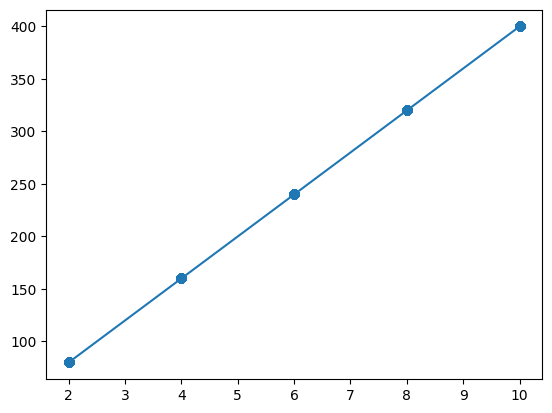

In [6]:
plt.plot(jar['Fission Rate (10^14 f/cm3/s)'],
            jar['Heat Flux (W/cm2)'], '-o')

*Heat flux is just a scaled version of fission rate.*

In [7]:
jar['Heat Flux (W/cm2)'].unique()

array([ 80., 160., 240., 320., 400.])

In [8]:
jar['Fission Rate (10^14 f/cm3/s)'].unique()

array([ 2,  4,  6,  8, 10])

In [9]:
jar['Coolant init Temp (C)'].unique()

array([ 60,  75,  88, 105, 120])

How to go about it?

A lot of plotting and exploration, maybe!
Plot variations due to fission rate for each grain size in a fgs vs fd graph.

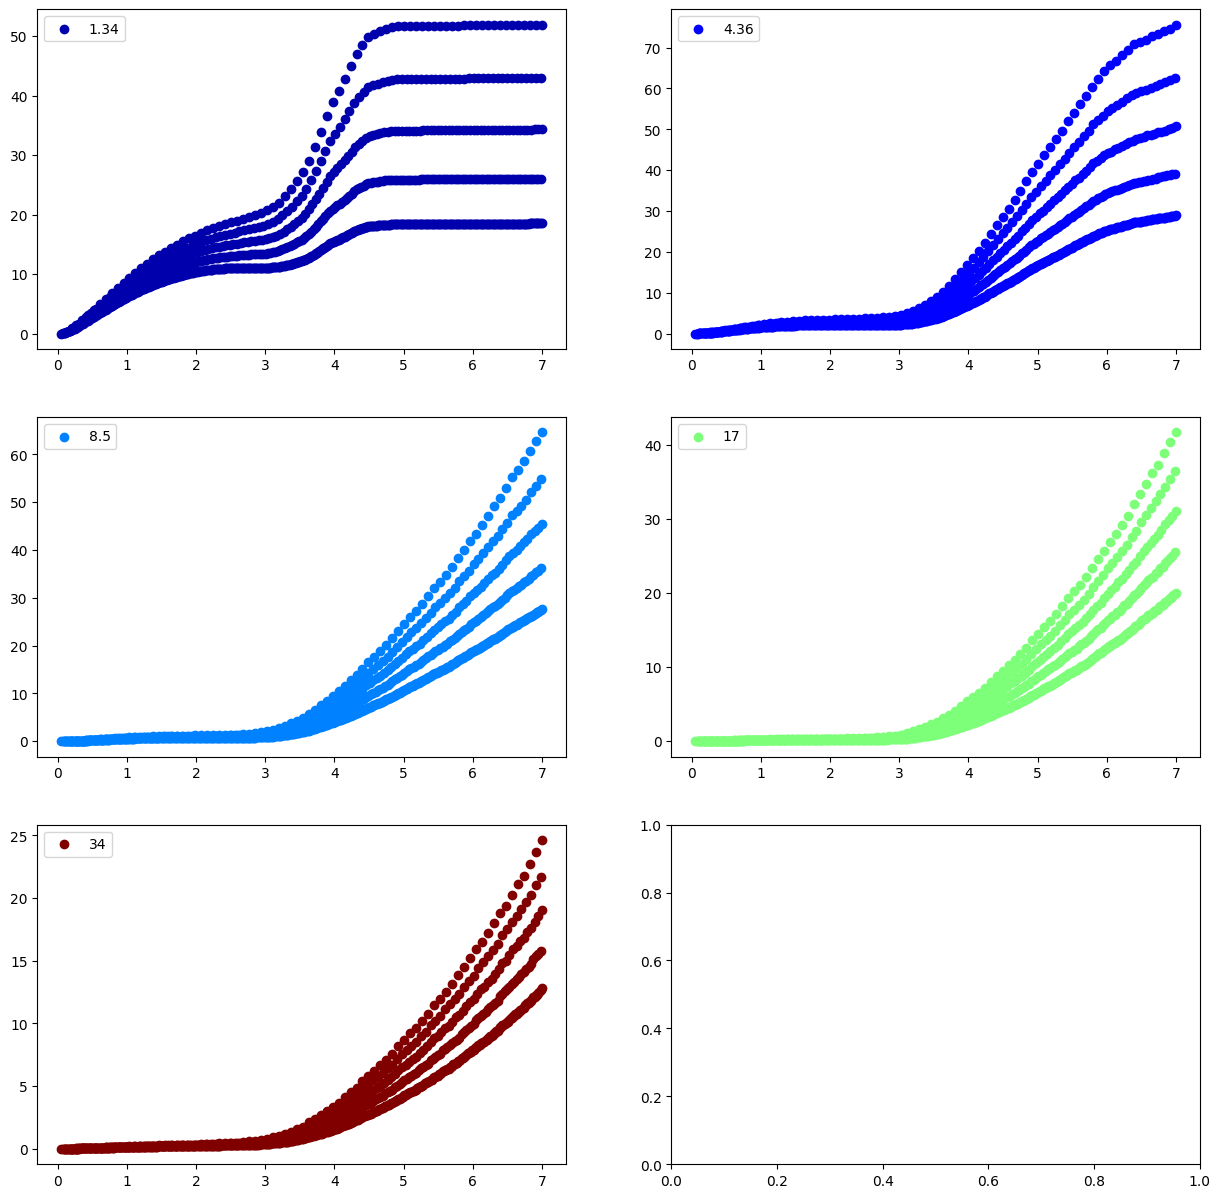

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
    foo = jar.loc[(jar['Coolant init Temp (C)'] == 88) & (jar[gs] == G)]
    axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
    axs[i//2, i%2].legend()
    
plt.show()

# The good part

In [11]:
def test(X, m):
    fd, D, r = X
    return pared(fd, D) * (m * (r-6) + 1)

In [12]:
tra = jar.loc[jar['Coolant init Temp (C)'] == 88]
tra

,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
9036,1,1.34,3,80.0,2,88,107.717991,0.05184,0.224557,0.017197
9037,1,1.34,4,80.0,2,88,107.720008,0.06912,0.320962,0.044482
9038,1,1.34,5,80.0,2,88,107.728701,0.08640,0.431325,0.085725
9039,1,1.34,6,80.0,2,88,107.731571,0.10368,0.554246,0.139526
9040,1,1.34,7,80.0,2,88,107.734838,0.12096,0.688110,0.204270
...,...,...,...,...,...,...,...,...,...,...
13601,5,34.00,77,400.0,10,88,183.857828,6.65280,47.754666,21.143466
13602,5,34.00,78,400.0,10,88,184.098546,6.73920,48.726028,21.769227
13603,5,34.00,79,400.0,10,88,184.263923,6.82560,50.000830,22.698430
13604,5,34.00,80,400.0,10,88,184.518724,6.91200,51.299377,23.651377


In [13]:
popt, pcov = curve_fit(test, (tra[fd], tra[gs], tra[fr]), tra[fgs])
popt

array([0.10456234])

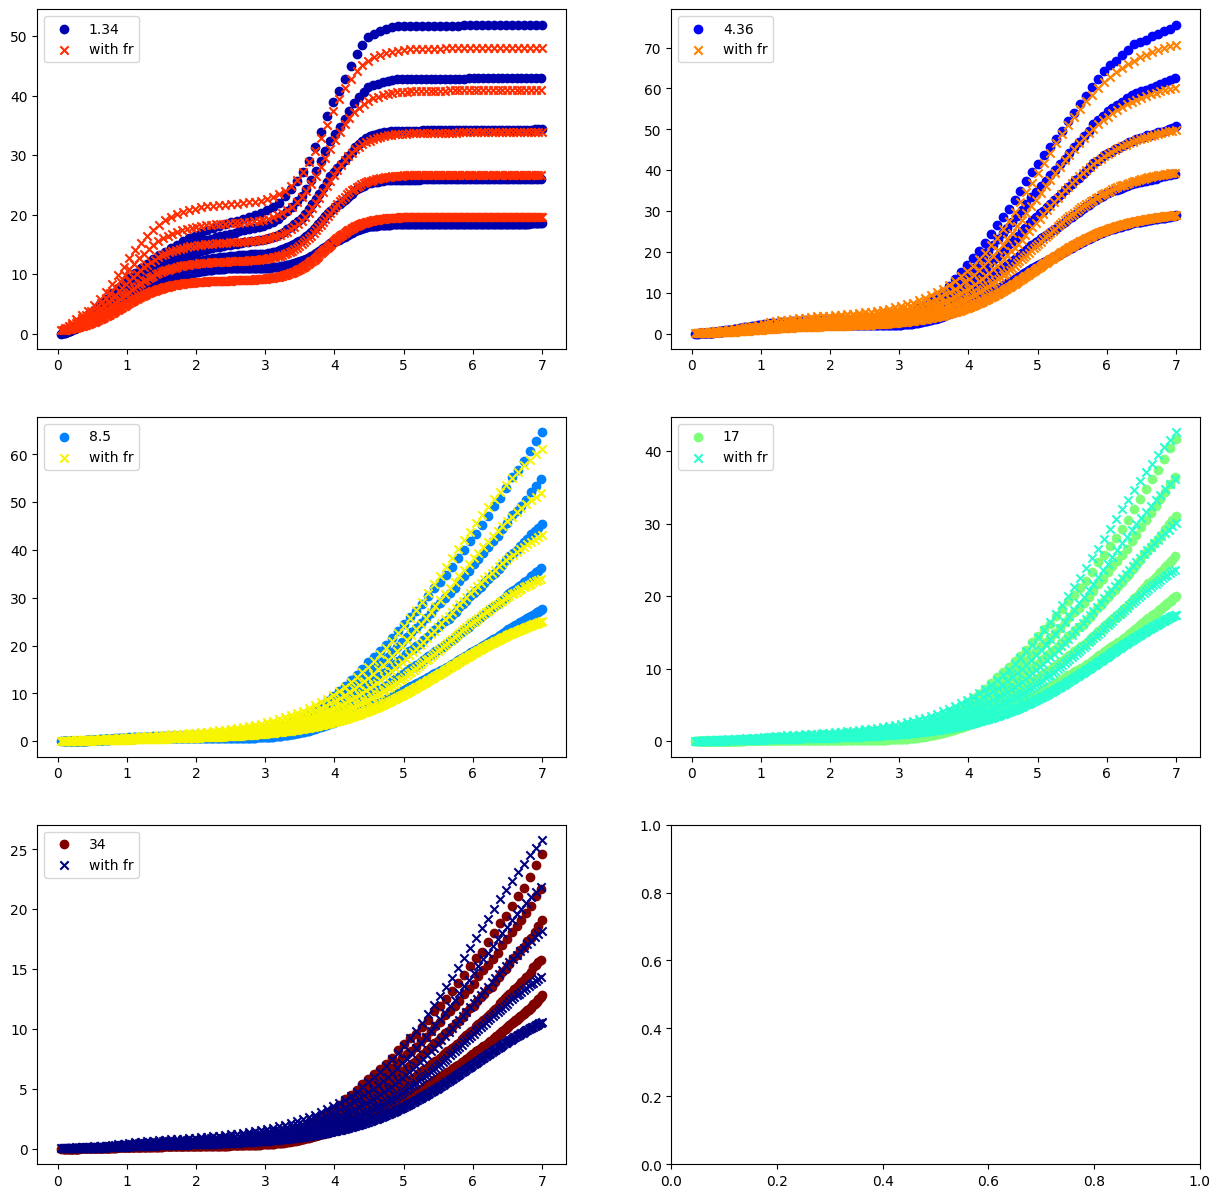

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
    foo = jar.loc[(jar['Coolant init Temp (C)'] == 88) & (jar[gs] == G)]
    axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
    pred = test((foo[fd], foo[gs], foo[fr]), 0.10456234)
    axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr')
    axs[i//2, i%2].legend()
    
plt.show()

**Except for the small grain size and high fission rate case, the fits look good. We can ignore the special case for now.**

Some pointers for further work:
- The first region might not scale up/down linearly.
- We can incorporate fission rate into the first-level parameters (A-N).
- We need to plot things with a line (not a scatter plot). It might show the shortcomings better.

# The final part

In [15]:
def final(fd, D, r, T):
    m1 = 0.10456234
    m2 = 0.00951745
    return pared(fd, D) * (m1 * (r-6) + 1) * (m2 * (T-88) + 1)

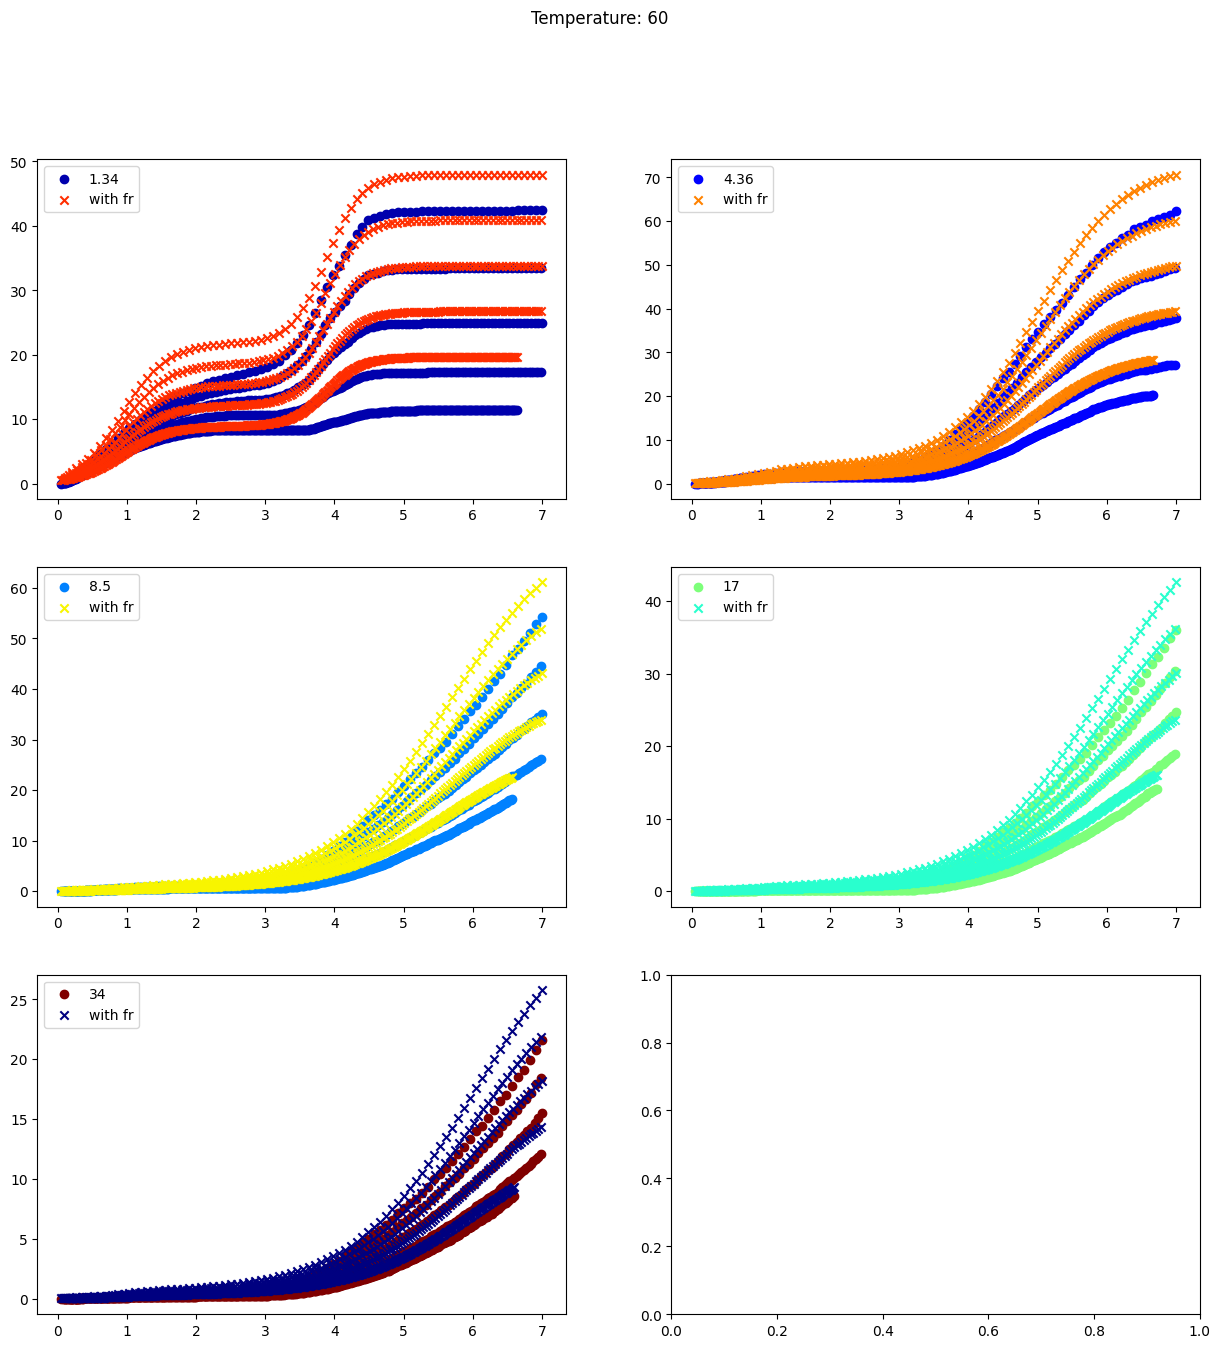

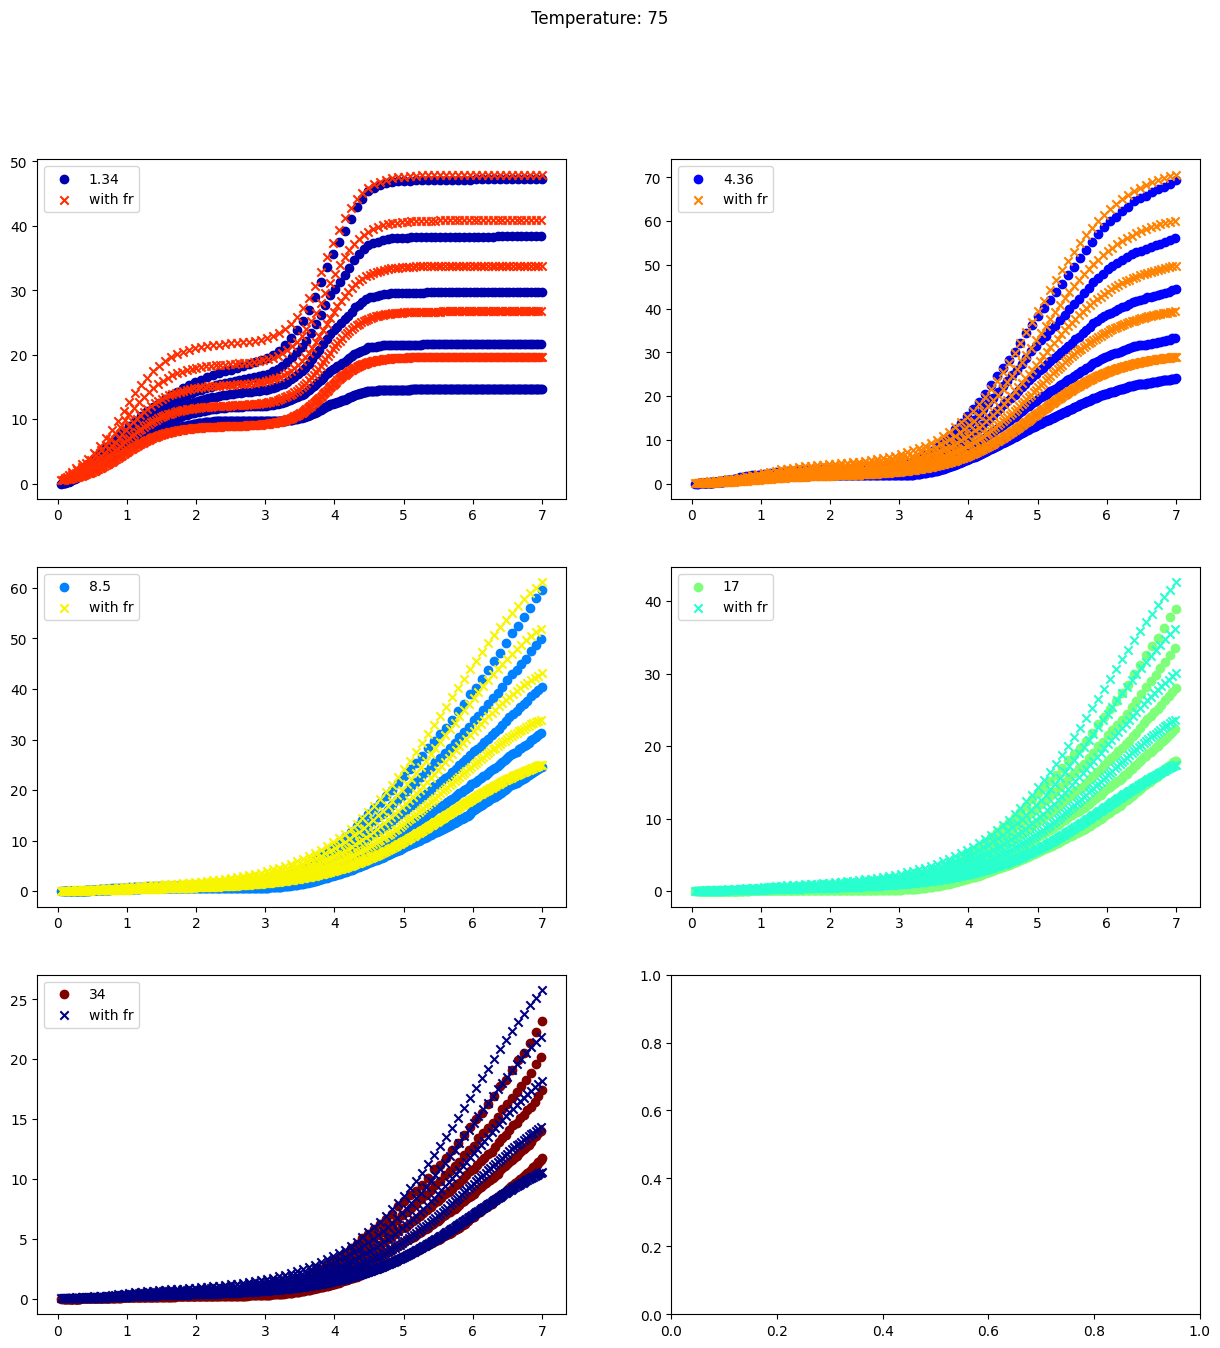

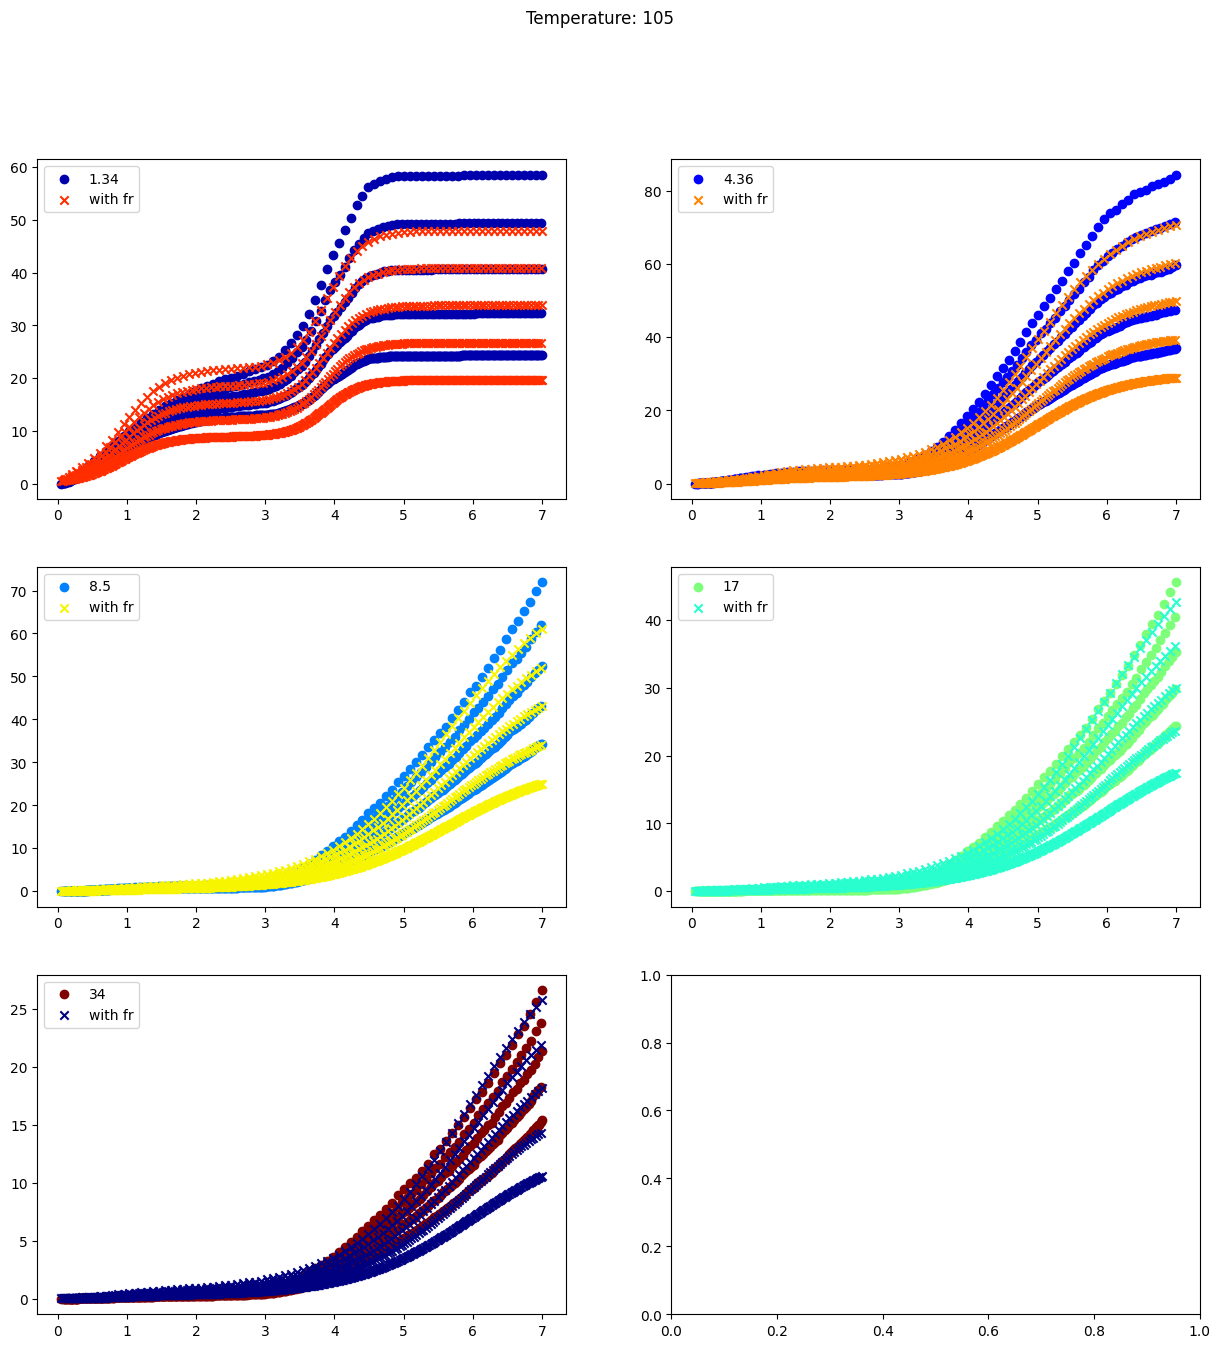

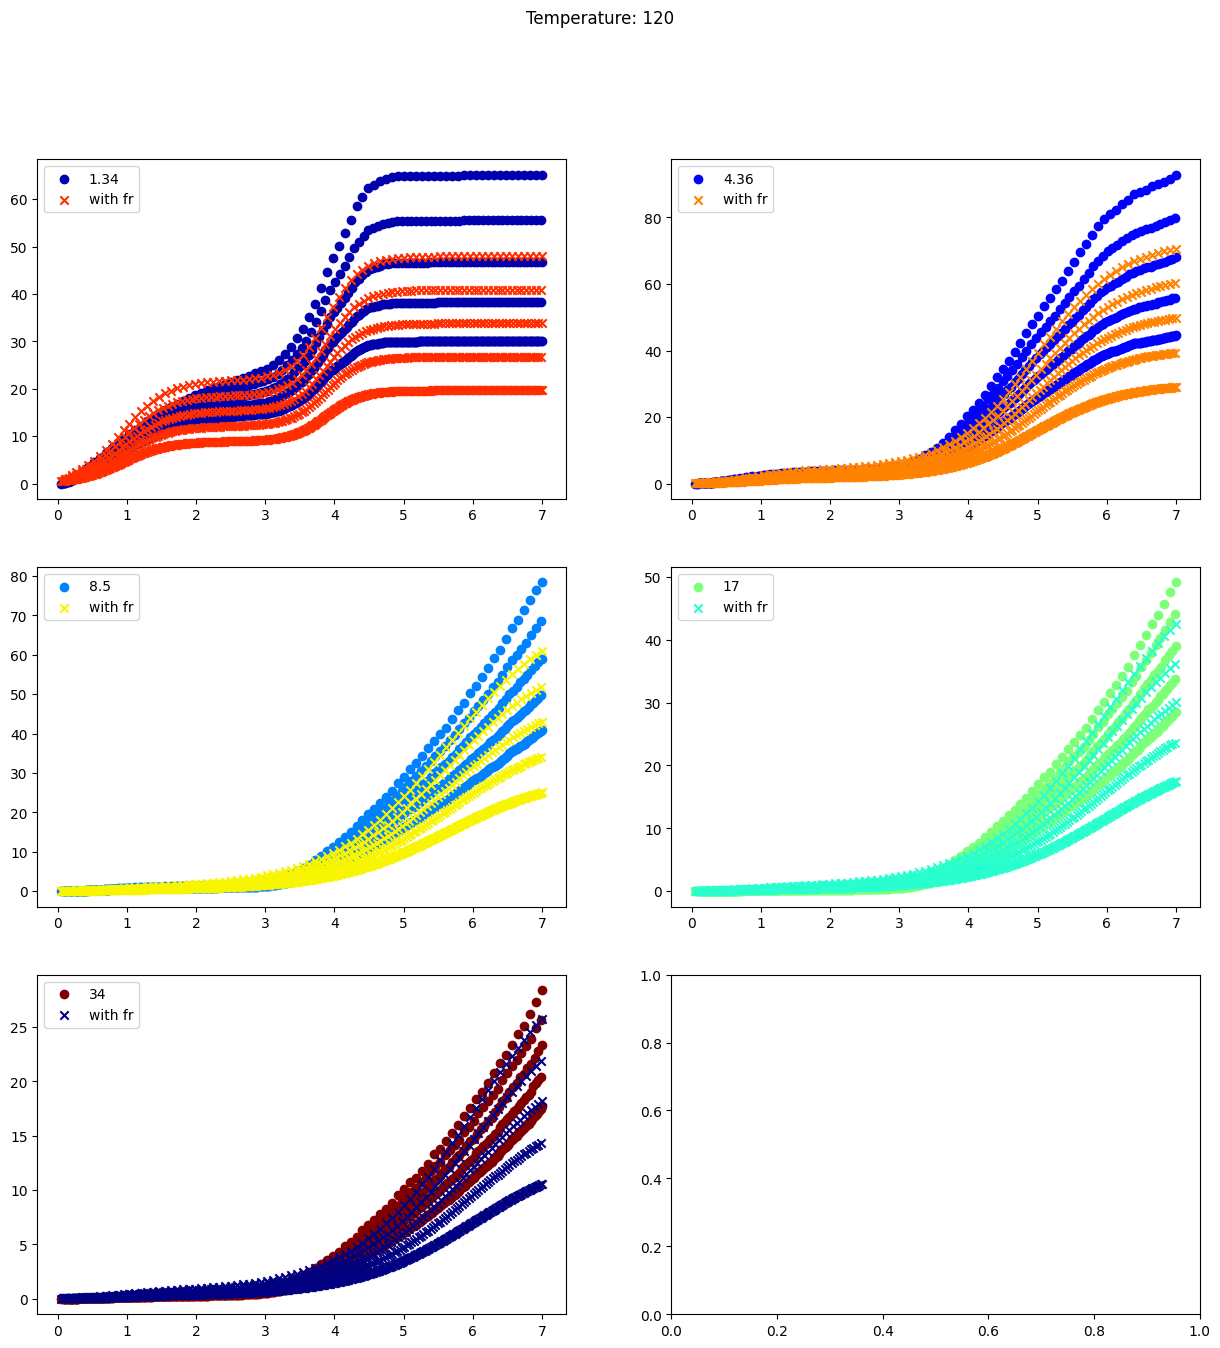

In [17]:
for cool in [60, 75, 105, 120]:
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(f'Temperature: {cool}')
    
    for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
        foo = jar.loc[(jar['Coolant init Temp (C)'] == cool) & (jar[gs] == G)]
        axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
        pred = test((foo[fd], foo[gs], foo[fr]), 0.10456234)
        axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr')
        axs[i//2, i%2].legend()
        
    plt.show()

**There is interaction between fission rate and temperature. I cannot simply multiply the functions for these parameters.**